## ¿Quién cuida a quienes nos cuidaron? 
La población de Cuba se ha visto gravemente afectada por la compleja situación económica que está viviendo el país, especialmente los adultos mayores. Más del 25% de los cubanos tienen 60 años o más, una cifra que refleja el envejecimiento progresivo de la sociedad cubana. Este grupo es vulnerable y, por lo tanto, enfrenta grandes desafíos, debido a que la pensión mínima estatal ronda los 3056 cup, una cantidad que resulta insuficiente para cubrir las necesidades básicas en un contexto de alta inflación y fluctuación del dólar.

El 4 de marzo de 2022, Cubadebate publicó un artículo titulado "Más viejos, más vulnerables: Los achaques económicos del adulto mayor", escrito por: Roberto Alfonso Lara, Roxana Martínez Abreu, Luana Lobelle Muñiz, y Darline Shenandra Carbó Díaz. Esta noticia expuso la situación de los ancianos en Cienfuegos, resaltando su creciente invisibilidad social y la insuficiencia de las pensiones frente al costo de la vida. A través de testimonios y datos oficiales, se revela cómo la vejez en la isla está marcada por escasez, dependencia y lucha diaria por la subsistencia.

Actualmente, la economía en Cuba depende directamente del precio del dólar. Durante el 2025, el valor del dólar estadounidense(usd) en el mercado cubano ha variado de manera considerable, llegando a superar los 450 pesos cubanos por dólar, esto a su vez, generó que aumentaran los precios en productos y servicios, dificultando aún más las capacidades adquisitivas de los adultos mayores.

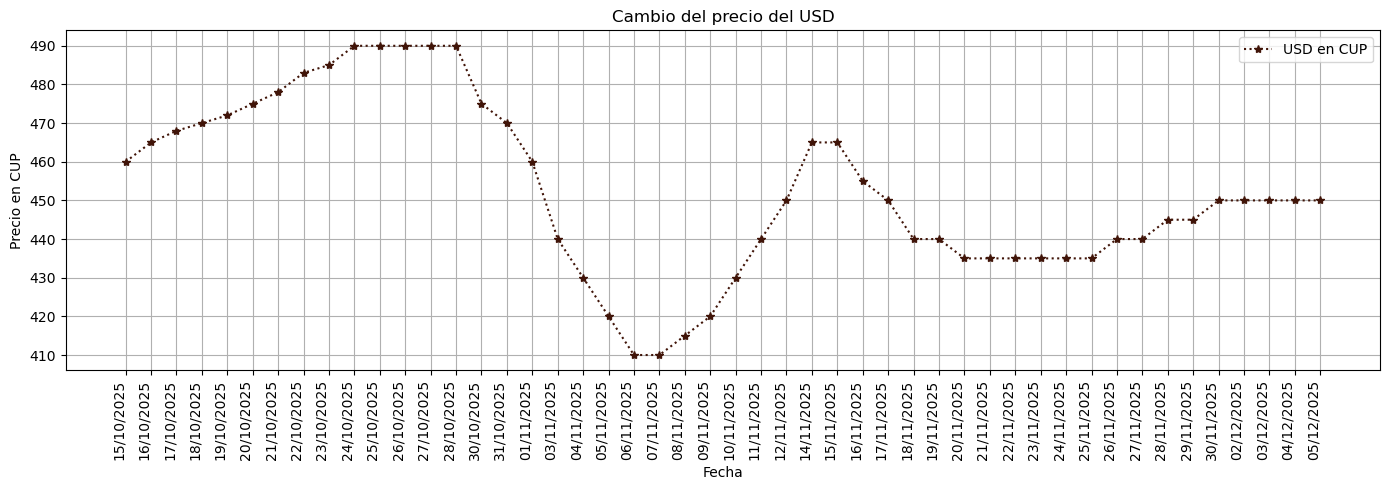

In [8]:
import utils

utils.grafico_precio_usd("precio_usd.json")

La mayoría de los cubanos realizaba sus compras en mercados estatales que vendían en moneda nacional (CUP), pero, a causa de la situación actual, estos mercados enfrentan una creciente escasez de productos básicos. Los consumidores se ven obligados a realizar sus compras en mercados particulares, los cuales cada día son más comunes para la población. La Oficina Nacional de Estadística e Información (ONEI) reportó en diciembre del 2025 que cantidad de establecimientos por tipo de mercado, en La Habana, era de: 83,31% particulares y 12,51% estatales; y en Centro Habana de: 13.40% estatales y 81.23% particulares.


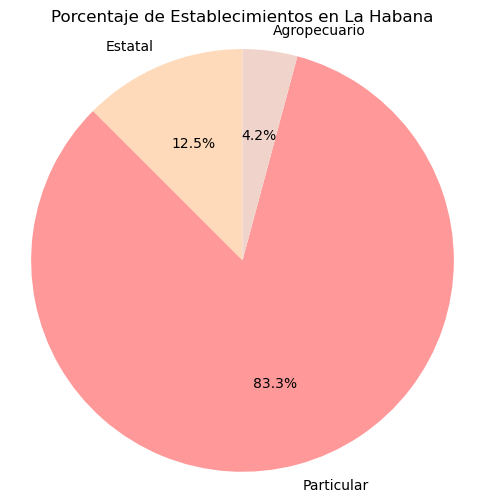

In [1]:
import utils

etiquetas, valores = utils.data_habana("porciento_mercados.json")
utils.grafico_pie_habana(etiquetas, valores)

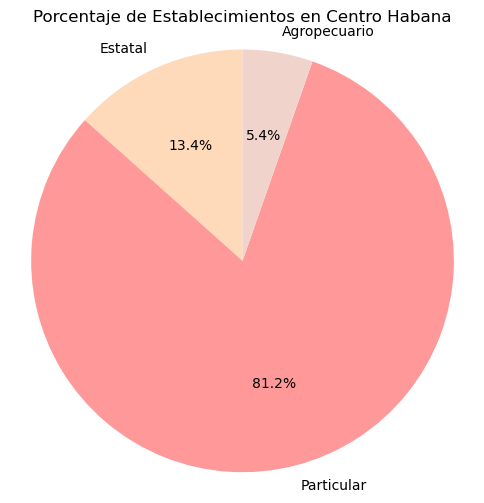

In [2]:
import utils

etiquetas, valores = utils.data_ch("porciento_mercados.json")
utils.grafico_pie_ch(etiquetas, valores)

Estos mercados particulares, cada vez más comunes, se ven obligados a fijar sus precios tomando como referencia principal el dólar estadounidense. Esta práctica, aunque ayuda a reponer mercancías faltantes que la población solicita, ha provocado que los precios de productos básicos alcancen niveles que resultan inalcanzables para gran parte de la población. Los adultos mayores, que dependen exclusivamente de una pensión en moneda nacional, suelen ser los más afectados. Con ingresos insuficientes, ven difícil acceder a alimentos, medicinas y artículos de primera necesidad.


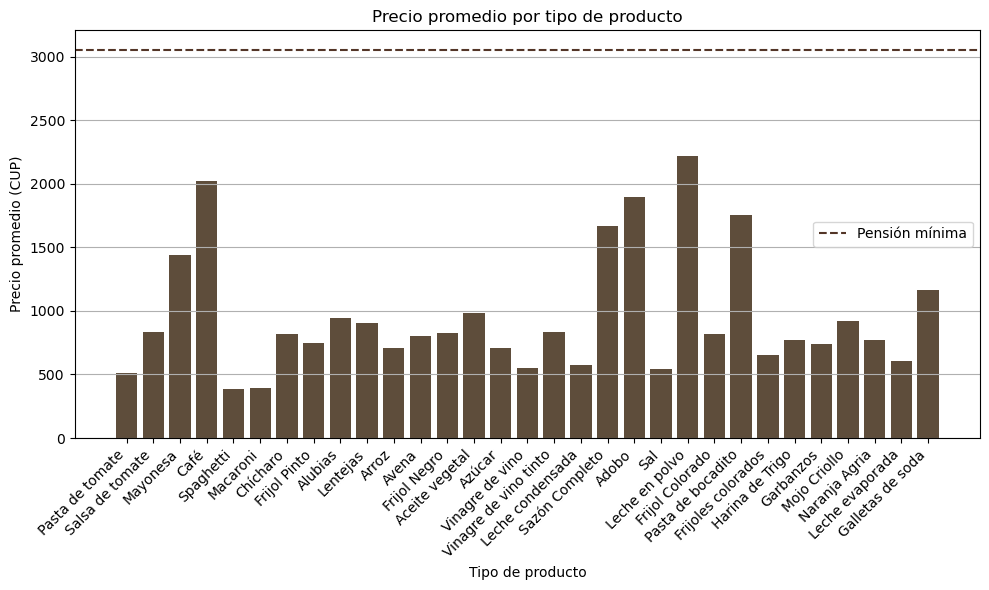

In [3]:
import utils

prom_precios = utils.promedio_precios_cup("tiendas.json")
utils.graficar_promedios(prom_precios)

El crecimiento de la dolarización informal ha transformado totalmente la perspectiva de consumo en la isla. Muchos productos esenciales, desde alimentos hasta artículos de higiene, se comercializan en dólares o con precios en función a esta moneda, esto ha disparado su valor en el mercado. Esta realidad ha obligado al gobierno a intervenir, estableciendo topes de precios en algunos productos básicos con la intención de contener la inflación y proteger a los sectores más vulnerables de la población.

Sin embargo, en la práctica, estas medidas no siempre logran su cometido. Los controles de precios, aunque bien intencionados, a menudo se enfrentan a una oferta limitada, lo que genera desabastecimiento y mercados paralelos. Para muchos cubanos, especialmente los adultos mayores que dependen exclusivamente de pensiones fijas en moneda nacional, esta situación representa un gran desafío.

La escasez no solo afecta su alimentación, sino también su acceso a medicamentos, productos de higiene y otros bienes indispensables para una vida digna. En este contexto, la inflación no es solo una cifra económica: es una amenaza directa a su bienestar, su salud y su autonomía.

"Somos conscientes de que con los precios de hoy día, exorbitantes, la pensión mínima no satisface las necesidades de los jubilados”, admitió Lino Pérez Díaz, director provincial del Instituto Nacional de Seguridad Social (Inass) en Cienfuegos. - Cubadebate, 4 de marzo de 2022

### Productos básicos con precios topados                         

| Productos      | Unidad de medida | Precio |
|----------------|------------------|--------|
| Leche en polvo | 1 kg             | 1045   |
| Pastas alimenticias | 1 kg        | 835    |
| Pastas alimenticias | 500 g       | 417    |
| Aceite         | 1 lt              | 900    |
| Aceite         | 900 ml           | 810    |
| Aceite         | 800 ml           | 720    |
| Aceite         | 700 ml           | 630    |

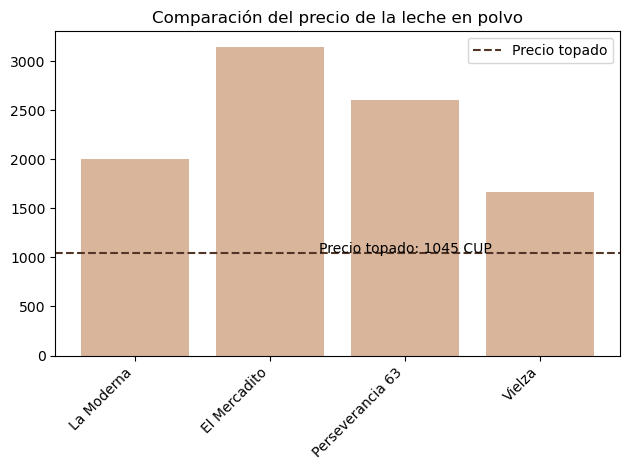

In [4]:
import utils

data = utils.leche_en_polvo("tiendas.json")
utils.grafica_comp_leche(data)

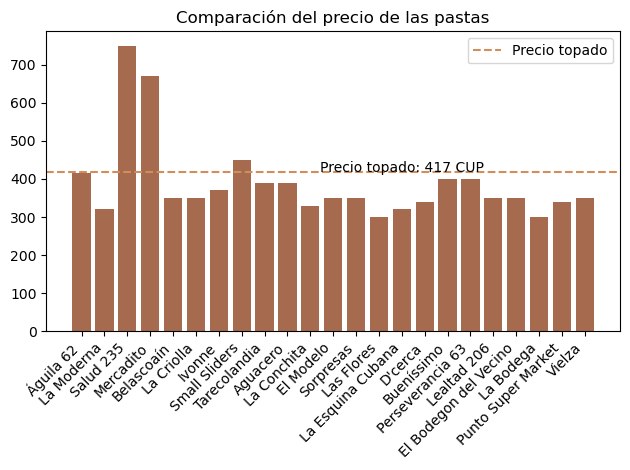

In [5]:
import utils

data = utils.spaghetti("tiendas.json")
utils.grafica_comp_spaghetti(data)

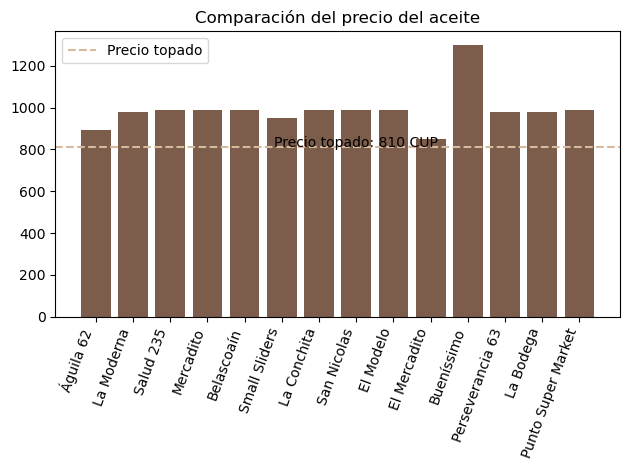

In [6]:
import utils

data = utils.aceite("tiendas.json")
utils.grafica_comp_aceite(data)

Recientemente, han surgido muchas tiendas estatales que venden productos en dólares (USD), esta medida fue tomada por el Estado para obtener divisas, mejorando con esto la condición actual. Estas tiendas ofrecen una mayor variedad de alimentos y productos esenciales, sin embargo, sus precios son mucho más altos que los del mercado en moneda nacional, a causa de esto muchas personas no puedan acceder a ellos fácilmente. Los adultos mayores nuevamente son los más afectados, debido a que su mayoría depende únicamente de pensiones en pesos cubanos que no alcanzan para cubrir estos costos. Para ellos, conseguir alimentos básicos como leche, aceite o productos de higiene personal se vuelve casi imposible sin la ayuda económica de familiares, ya sea para hacer las compras o para proporcionar la moneda extranjera necesaria. Esta dependencia aumenta la vulnerabilidad de un grupo que ya enfrenta muchos retos en su día a día.

“Sumémosle a esto la enorme cantidad de ancianos que viven solos, un fenómeno agudizado en la última década”, añadió Olga Lourdes Vila Pérez, catedrática de la UCf y autora de varias investigaciones sobre el envejecimiento poblacional en el país. “Hablamos de adultos mayores abandonados por sus familias, e igual por los hijos y parientes cercanos que hoy emigran, lo cual hace que sean mucho más vulnerables”, subrayó. - Cubadebate, 4 de marzo de 2022 

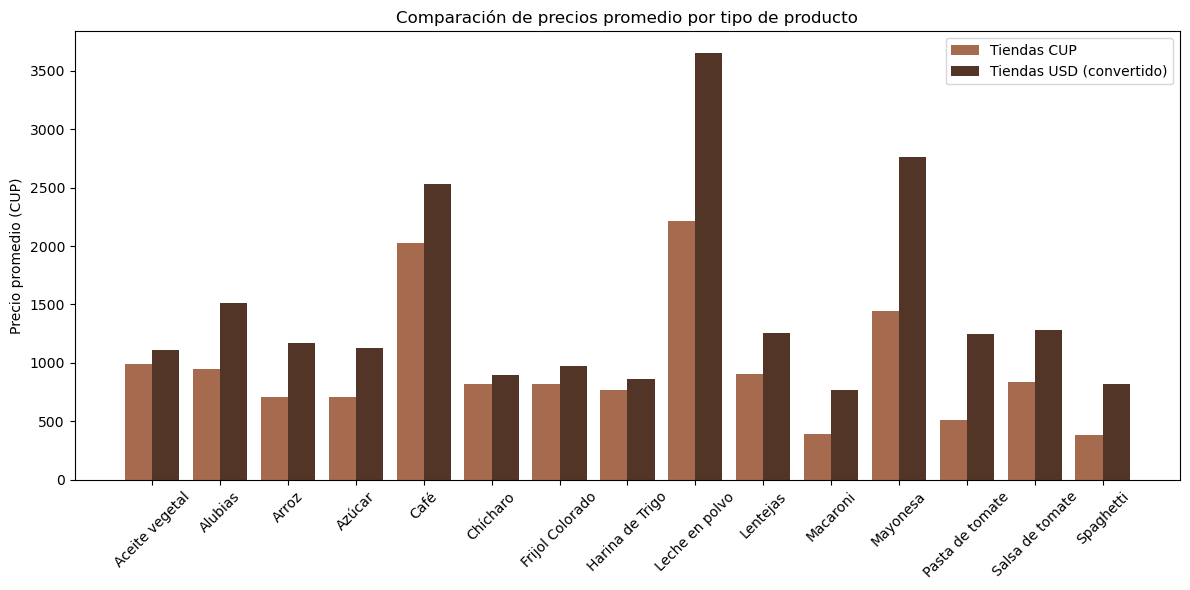

In [7]:
import utils

prom_cup = utils.promedio_precios_cup("tiendas.json")
prom_usd = utils.promedio_precios_usd("tiendas_usd.json")
utils.grafica_comparacion(prom_cup, prom_usd)

En el contexto económico de Cuba en 2025, los ancianos enfrentan una situación preocupante: la pensión mínima de 3056 CUP apenas alcanza para cubrir productos básicos en el mercado. Con un tipo de cambio informal que ronda los 450 CUP por dólar, esta pensión equivale a menos de 7 USD mensuales, esto limita drásticamente el acceso a tiendas que operan en divisas, en las cuales los precios son más estables pero inaccesibles para quienes no reciben remesas o ingresos en dólar. Incluso en tiendas que venden en moneda nacional, productos esenciales como el café, el aceite o la mayonesa pueden costar entre 1000 y 3000 CUP, consumiendo gran parte o incluso la totalidad de la pensión mensual.

Además, la estructura del comercio en Centro Habana está dominada por establecimientos particulares (81.23%), lo que sugiere una menor regulación de precios y una mayor exposición a la especulación, causada por la variación del USD. Esta realidad empeora si se tiene en cuneta la limitada infraestructura de apoyo social: apenas existen 35 casas de abuelos y 20 hogares de ancianos en toda La Habana, lo que resulta insuficiente para una población envejecida y vulnerable. En conjunto, estos factores crean un escenario en donde los jubilados tienen limitada capacida adquisitiva, poco respaldo por el estado y un mercado cada vez más dolarizado.
